
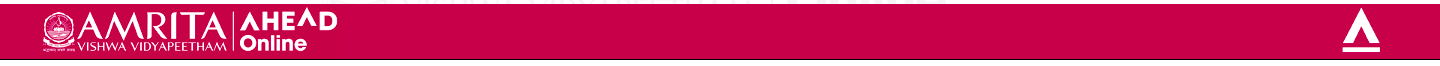

#Download Dataset

In [1]:
#!wget https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv

In [2]:
#ls

In [3]:
data_file = 'bbc-text.csv'

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv(data_file)
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
df.sample(15)

,category,text
899,sport,williams stays on despite dispute matt william...
355,business,eu too slow on economic reforms most eu coun...
685,business,iraq and afghanistan in wto talks the world tr...
661,entertainment,vibe awards back despite violence the us vibe ...
1380,business,world leaders gather to face uncertainty more ...
882,tech,web logs aid disaster recovery some of the mos...
1123,business,qantas sees profits fly to record australian a...
914,business,us economy shows solid gdp growth the us econo...
1027,business,uk coal plunges into deeper loss shares in uk ...
516,politics,labour mp praises tory campaign the conservati...


In [6]:
df.shape

(2225, 2)

#Preprocess Data

run the notebook - use the functions

In [7]:
%run preprocess.ipynb

https://pandas.pydata.org/docs/reference/api/pandas.factorize.html

In [8]:
df['category_id'] = df['category'].factorize()[0]

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [9]:
import time

In [10]:
t1 = time.time()

In [11]:
%%time
df['clean_text'] = df['text'].apply(preprocess1)

Wall time: 15.8 s


In [12]:
t2 = time.time()

In [13]:
t2-t1

15.84478497505188

In [14]:
#save the pre-processed dataframe
df.to_csv('bbc_preprocessed.csv')

find the mapping between class labels and factorized number

In [15]:
print(df.category_id.unique(),df.category.unique())

[0 1 2 3 4] ['tech' 'business' 'sport' 'entertainment' 'politics']


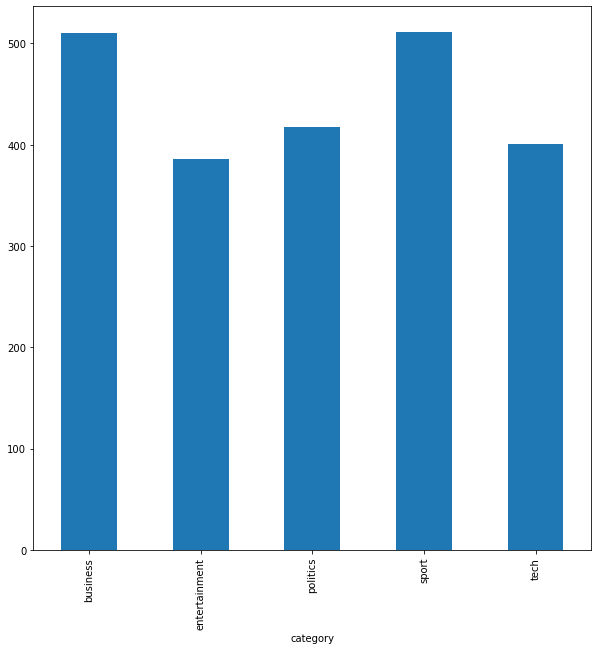

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
df.groupby('category').text.count().plot.bar(ylim=0)
plt.show()

#Vectorize Text Data

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = df['clean_text'] # getting the text column

tfidf_vectorizer = TfidfVectorizer() #tfidf

X = tfidf_vectorizer.fit_transform(texts) #features -> text data

y = df['category_id'].values #target --> labels/classes

print(X.shape)
print(y.shape)

#2225,2 --> 2225, 18536  
#18536 unique words - tfidf

(2225, 18541)
(2225,)


In [37]:
type(X)

scipy.sparse.csr.csr_matrix

In [18]:
from pickle import dump
dump(tfidf_vectorizer,open('tfidf.pkl', 'wb'))

In [36]:
type(tfidf_vectorizer)

sklearn.feature_extraction.text.TfidfVectorizer

if you want to reduce the dimensions

In [19]:
#import numpy as np

#u, s, vh = np.linalg.svd(X[:20].toarray(), full_matrices=True)

In [20]:
#t=pd.DataFrame(u)
#t

#Training and Testing data

Splitting data into training set and test set

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

stratify --> balance the classes

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, shuffle = True, stratify = y,random_state = 3)

#KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


Creating the classifier/model/estimator using training set

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()  #KNeighborsClassifier(5)

knn.fit(X_train, y_train)  #training dataset

KNeighborsClassifier()

In [23]:
#knn  --> classifier or model

fit -- > create the model


predict--> test the model also unseen data

#Evaluating your model 
Using test set

Accuracy Score

score() --> check the accuracy

In [24]:
knn.score(X_test,y_test)

0.9341317365269461

In [25]:
predicted = knn.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.9341317365269461

#Save Model

In [27]:
dump(knn, open('knn_model.pkl', 'wb'))

#Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=y_test, y_pred=predicted)
confusion

array([[117,   1,   0,   0,   2],
       [  9, 136,   0,   1,   7],
       [  0,   2, 151,   0,   1],
       [  8,   2,   2, 100,   4],
       [  1,   1,   2,   1, 120]], dtype=int64)

https://seaborn.pydata.org/generated/seaborn.heatmap.html

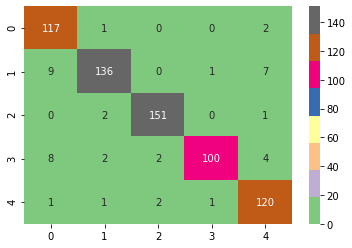

In [29]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(confusion, annot=True,fmt="d",cmap=plt.cm.Accent)
plt.show()

G:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


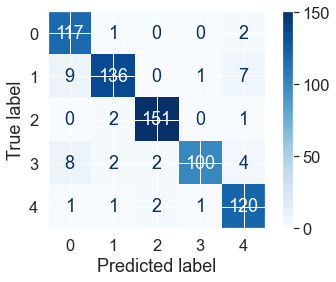

In [30]:

from sklearn.metrics import plot_confusion_matrix


sn.set(font_scale=1.5) # for label size

plot_confusion_matrix(knn, X_test, y_test,cmap=plt.cm.Blues,values_format='1')
plt.show()

Classification report

In [31]:
from sklearn.metrics import classification_report
from pprint import pprint

In [32]:
pprint(classification_report(y_test, predicted))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.87      0.97      0.92       120\n'
 '           1       0.96      0.89      0.92       153\n'
 '           2       0.97      0.98      0.98       154\n'
 '           3       0.98      0.86      0.92       116\n'
 '           4       0.90      0.96      0.93       125\n'
 '\n'
 '    accuracy                           0.93       668\n'
 '   macro avg       0.93      0.93      0.93       668\n'
 'weighted avg       0.94      0.93      0.93       668\n')


#Testing with new data instance

In [33]:
from pickle import load

tfidf_vectorizer = load(open('tfidf.pkl', 'rb'))
knn = load(open('knn_model.pkl', 'rb'))

In [34]:
new_news = 'Kotak Institutional Equities expects modest returns from the Indian stock market in the base-case scenario of a strong economic recovery and a gradual increase in global and domestic bond yields, but stock-specific action will continue, especially in midcaps.'
#preprocess, vectorize
new_news = preprocess1(new_news)
vec = tfidf_vectorizer.transform([new_news])
y_predict = knn.predict(vec)

In [35]:
classes = {0:'tech',1:'business',2:'sport',3:'entertainment',4:'politics'}
classes[y_predict[0]]

'business'

Natural Language Processing - Lab Manual
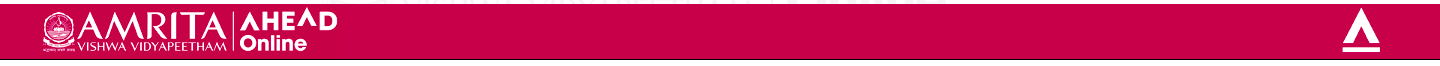